## Lectura

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Volver a leer los DataFrames desde los archivos CSV con Pandas
df_SM_full = pd.read_csv('data/df_SM_full.csv')
df_combined = pd.read_csv('data/df_combined.csv')
df_UC = pd.read_csv('data/df_UC.csv')
df_SM190_a_SMBL255 = pd.read_csv('data/df_SM190_a_SMBL255.csv')

In [4]:
# Consulta 1: Tabla de profesiones con porcentaje
tabla_profesiones = df_SM_full['OFICIO ACTUAL'].value_counts(normalize=True) * 100
tabla_profesiones

OFICIO ACTUAL
MINERÍA                                    33.333333
AMA DE CASA                                25.000000
No sabe/No responde                         7.894737
ESTUDIANTE                                  6.140351
AGRICULTOR                                  6.140351
NO TIENE/NO TRABAJA                         3.070175
COMERCIANTE                                 1.315789
MOTOTAXISTA                                 1.315789
COSTURERA                                   0.877193
YA NO TRABAJA POR LA EDAD                   0.877193
VENDEDOR PESCADO                            0.877193
MOTOCARRO                                   0.877193
PESCADOR                                    0.877193
SUPERVISORA PAE                             0.438596
COMERCIANTE VERDURAS                        0.438596
VENDEDOR DE CHANCE                          0.438596
MECÁNICO                                    0.438596
AYUDANTE ALBAÑIL                            0.438596
COMERCIANTE DE MAÍZ Y PASTELES  

In [5]:
# Consulta 2: Tabla de frecuencias con edades
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
tabla_edades = pd.cut(df_SM_full['EDAD'], bins=bins, include_lowest=True, right=False).value_counts(sort=False)
tabla_edades

EDAD
[0, 10)       1
[10, 20)     23
[20, 30)     22
[30, 40)     40
[40, 50)     38
[50, 60)     64
[60, 70)     19
[70, 80)     16
[80, 90)      5
[90, 100)     0
Name: count, dtype: int64

In [6]:
# Consulta 3: Tabla de porcentaje de sexo (M=1, F=2)
tabla_sexo = df_SM_full['SEXO M(1) F (2)'].value_counts(normalize=True) * 100
tabla_sexo

SEXO M(1) F (2)
1.0    61.842105
2.0    38.157895
Name: proportion, dtype: float64

In [7]:
# Consulta 4: Tabla de porcentajes de 'TIPO DE USUARIO EN EL SGSSS'
tabla_tipo_usuario = df_SM_full['TIPO DE USUARIO EN EL SGSSS'].value_counts(normalize=True) * 100
tabla_tipo_usuario

TIPO DE USUARIO EN EL SGSSS
2.0    97.807018
1.0     1.315789
3.0     0.877193
Name: proportion, dtype: float64

In [8]:
# Consulta 5: Tabla de frecuencias de años que llevan los de 'MINERÍA' en su oficio
mask_mineria = df_SM_full['OFICIO ACTUAL'].str.contains(r'^(MINER|MINERÍA)', case=False, na=False)
tabla_anios_mineria = df_SM_full.loc[mask_mineria, 'TIEMPO QUE LLEVA LABORANDO EN SU OFICIO ACTUAL'].value_counts()
tabla_anios_mineria

/tmp/ipykernel_7229/1532110656.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask_mineria = df_SM_full['OFICIO ACTUAL'].str.contains(r'^(MINER|MINERÍA)', case=False, na=False)


TIEMPO QUE LLEVA LABORANDO EN SU OFICIO ACTUAL
20.00    9
30.00    6
2.00     6
10.00    5
15.00    5
35.00    4
1.00     4
3.00     4
25.00    4
8.00     3
18.50    3
12.00    2
18.00    2
23.00    2
4.00     2
5.00     2
37.00    1
19.00    1
40.00    1
27.00    1
16.00    1
7.00     1
13.00    1
17.00    1
42.00    1
50.00    1
0.25     1
21.00    1
6.00     1
Name: count, dtype: int64

In [9]:
# Consulta adicional: Tabla de porcentajes referente al nivel de Sisben
tabla_sisben = df_SM_full['EN QUE NIVEL LO CALIFICARON '].value_counts(normalize=True) * 100
tabla_sisben

EN QUE NIVEL LO CALIFICARON 
A1    88.157895
A2     6.140351
B1     1.754386
A4     1.315789
B2     0.877193
A      0.877193
C2     0.438596
A3     0.438596
Name: proportion, dtype: float64

## Guardar consultas en HTML

In [12]:
# Guardar tablas en HTML
tabla_profesiones.to_frame().to_html('queries/tabla_profesiones.html')
tabla_edades.to_frame().to_html('queries/tabla_edades.html')
tabla_sexo.to_frame().to_html('queries/tabla_sexo.html')
tabla_tipo_usuario.to_frame().to_html('queries/tabla_tipo_usuario.html')
tabla_anios_mineria.to_frame().to_html('queries/tabla_anios_mineria.html')
tabla_sisben.to_frame().to_html('queries/tabla_sisben.html')

## Gráficos

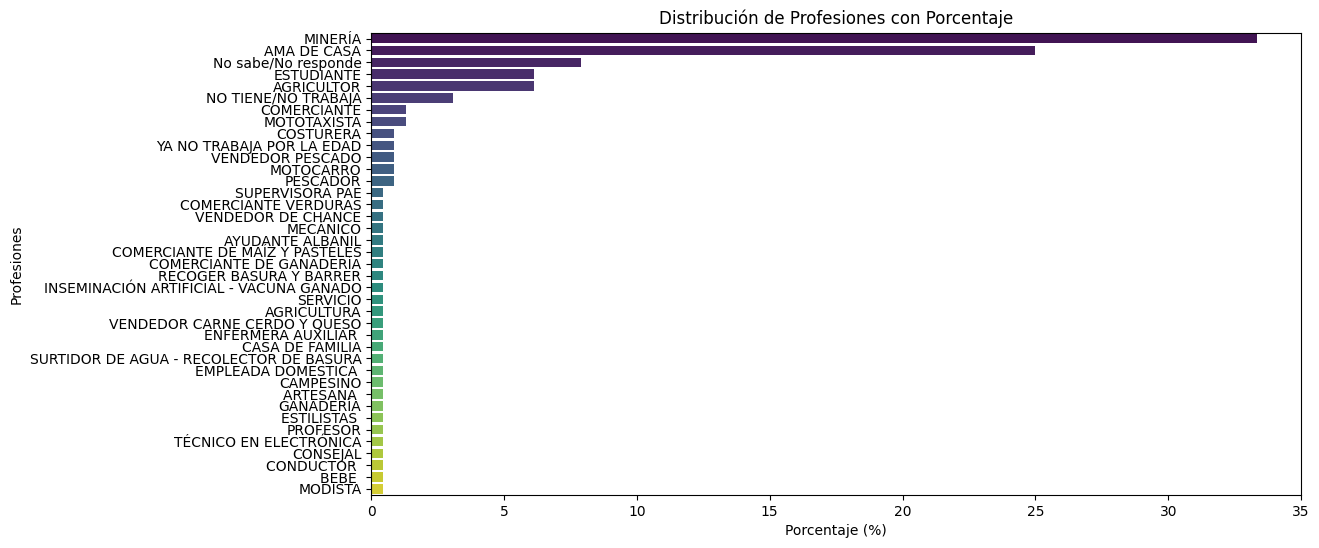

In [13]:
# Visualizaciones
# Gráfico 1: Barplot de profesiones con porcentaje
plt.figure(figsize=(12, 6))
sns.barplot(x=tabla_profesiones.values, y=tabla_profesiones.index, palette='viridis')
plt.title('Distribución de Profesiones con Porcentaje')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Profesiones')
plt.savefig('views/viz_profesiones.jpg', dpi=300)
plt.show()

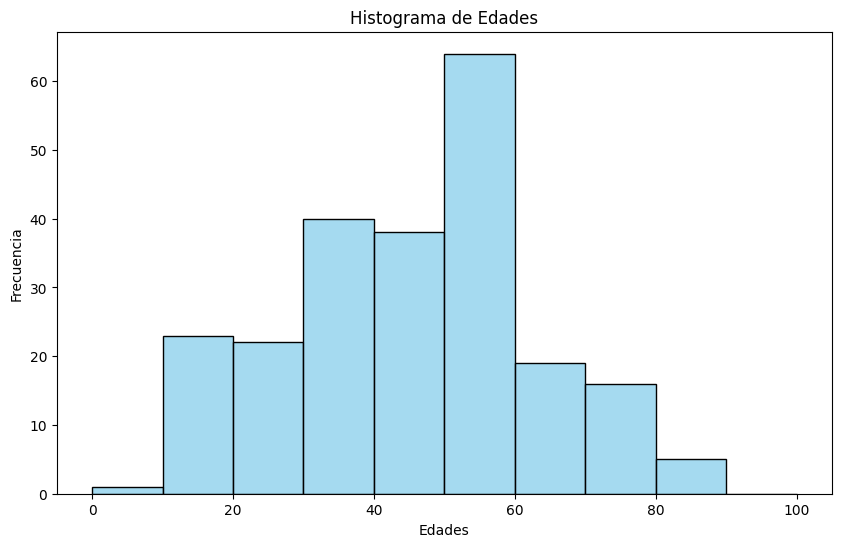

In [14]:
# Gráfico 2: Histograma de edades
plt.figure(figsize=(10, 6))
sns.histplot(df_SM_full['EDAD'], bins=bins, kde=False, color='skyblue')
plt.title('Histograma de Edades')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.savefig('views/viz_edades.jpg', dpi=300)
plt.show()

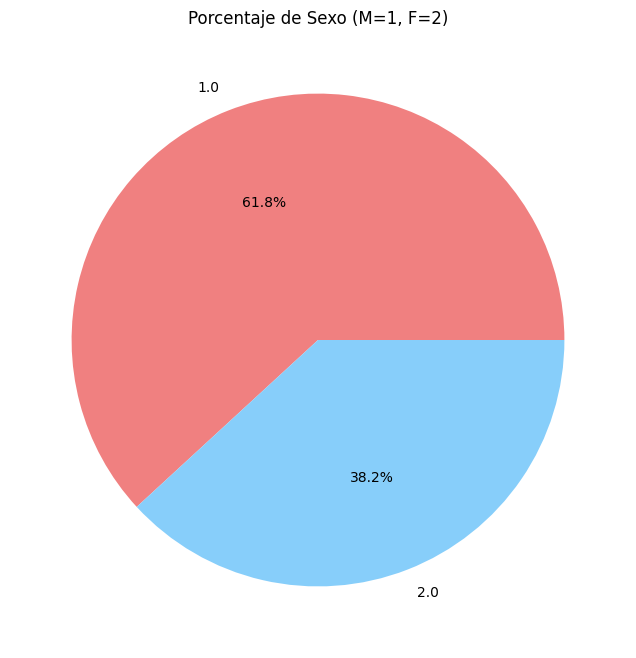

In [15]:
# Gráfico 3: Pie chart de porcentaje de sexo
plt.figure(figsize=(8, 8))
plt.pie(tabla_sexo, labels=tabla_sexo.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Porcentaje de Sexo (M=1, F=2)')
plt.savefig('views/viz_sexo.jpg', dpi=300)
plt.show()

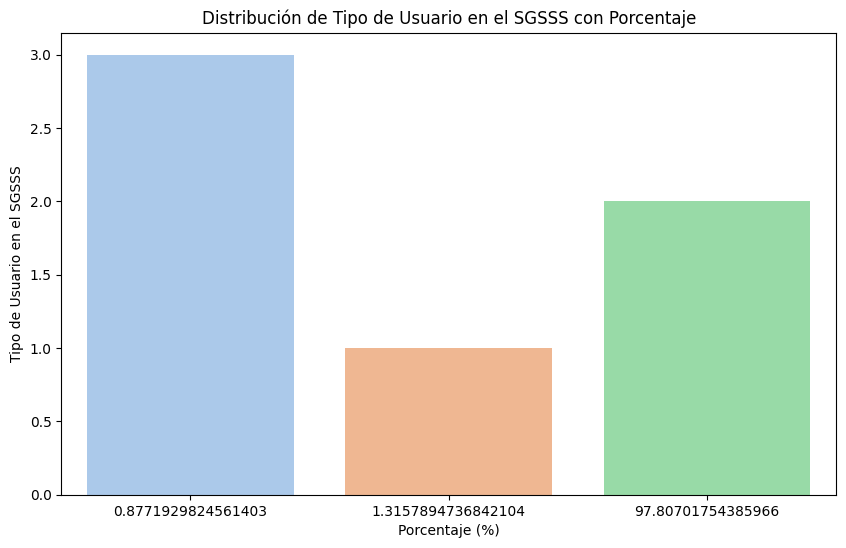

In [16]:
# Gráfico 4: Barplot de porcentaje de 'TIPO DE USUARIO EN EL SGSSS'
plt.figure(figsize=(10, 6))
sns.barplot(x=tabla_tipo_usuario.values, y=tabla_tipo_usuario.index, palette='pastel')
plt.title('Distribución de Tipo de Usuario en el SGSSS con Porcentaje')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Tipo de Usuario en el SGSSS')
plt.savefig('views/viz_tipo_usuario.jpg', dpi=300)
plt.show()

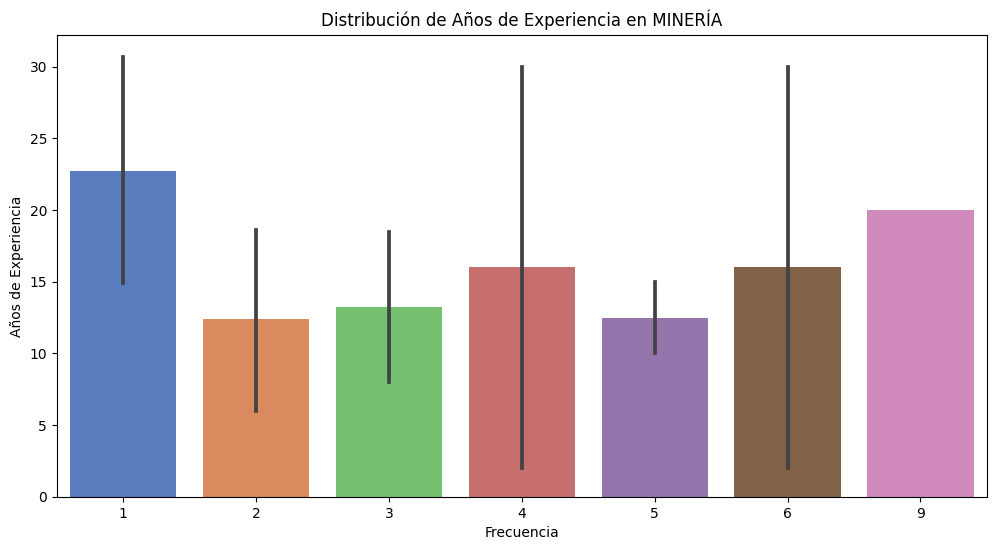

In [17]:
# Gráfico 5: Barplot de años de experiencia en 'MINERÍA'
plt.figure(figsize=(12, 6))
sns.barplot(x=tabla_anios_mineria.values, y=tabla_anios_mineria.index, palette='muted')
plt.title('Distribución de Años de Experiencia en MINERÍA')
plt.xlabel('Frecuencia')
plt.ylabel('Años de Experiencia')
plt.savefig('views/viz_anios_mineria.jpg', dpi=300)
plt.show()

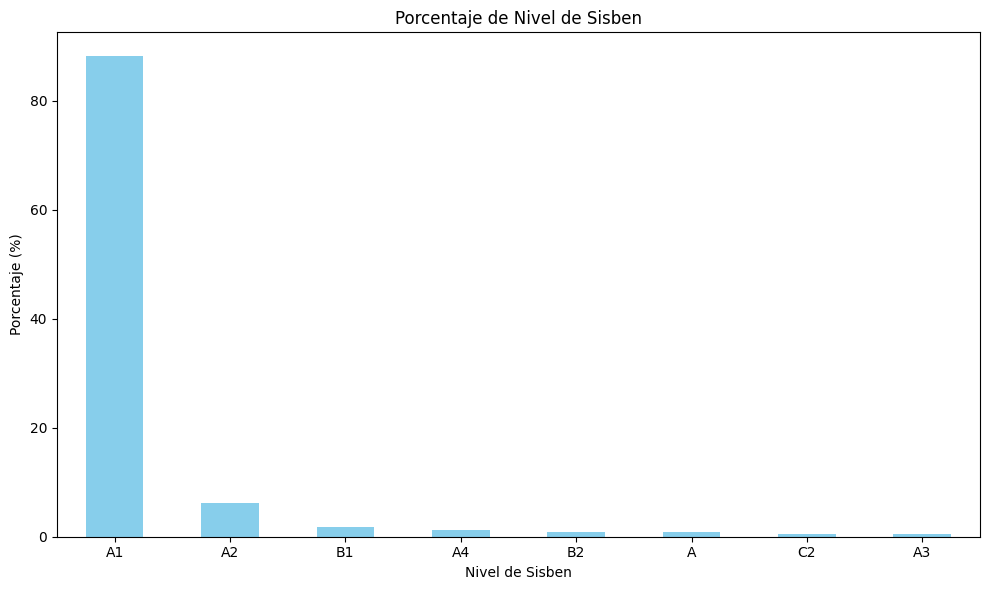

In [18]:
# Visualización: Gráfica de barras para la tabla de porcentajes de nivel de Sisben
plt.figure(figsize=(10, 6))
tabla_sisben.plot(kind='bar', color='skyblue')
plt.title('Porcentaje de Nivel de Sisben')
plt.xlabel('Nivel de Sisben')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=0)
plt.tight_layout()

# Guardar la visualización en un archivo JPG
plt.savefig('views/grafica_sisben.jpg')

# Mostrar la gráfica
plt.show()